## Generating the Truth (the observation values for assimilation)

We run the forward model and observe it at specific times.

In [1]:
import TruthGenerator

import Simulator
import Observation

In [2]:
import datetime
timestamp = datetime.datetime.now().strftime("%Y_%m_%d-%H_%M_%S")

### Definition of grid and advection diffusion system

We solve the equation

$\frac{\partial X(t,s)}{\partial t} = \nabla \cdot D \nabla X(t,s) - v_t \cdot \nabla X(t,s) + \zeta X(t,s)  + \epsilon(t,s)$

where $\epsilon$ is $\mathcal{N}(0,\mathbf{R}_t)$ model error. 

As parameters we choose 
- $D=0.25$
- $\mathbf{v} = (0.5,0.5)^\top$
- $\zeta=-0.0001$.

For the numerical solution a temporal forward amd spatial central finite-difference scheme is employed such that 

$\mathbf{X}_{t+1} = \mathbf{M}\mathbf{X}_t + \mathbf
{\epsilon}_t$



In [3]:
grid = Simulator.Grid(nx=50,ny=30,dx=0.1,dy=0.1)
simulator = Simulator.Simulator(grid, D=0.25, v=[0.5,0.5])

### Definition of prior distribution

In [4]:
prior_args = {"mean_upshift"     : 10.0, #Should be chosen that samples are non-negative everywhere
                "bell_center"    : [0.25,0.25],
                "bell_sharpness" : 0.1,
                "bell_scaling"   : 2.0,
                "matern_phi"     : 1.0, #Should be chosen such that correlation range = 1/4 to 1/3 of domain
                "variance"       : 1.0}

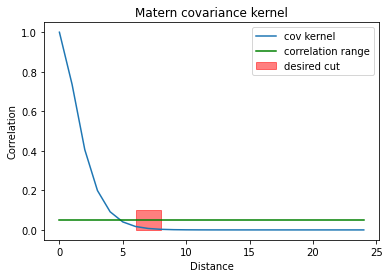

In [5]:
TruthGenerator.plot_kernel(grid, prior_args)

### Setting observation moorings

In [6]:
observation = Observation.Observation(simulator.grid)

Remember to set observation positions and to set/observe values!


In [7]:
import numpy as np

def observation_positions(grid, freq):
    poses = []
    for j in range(int(np.ceil(grid.ny/freq))):
        for i in range(int(np.ceil(grid.nx/freq))):
            poses.append([i*freq,j*freq])
    return poses

In [8]:
poses = observation_positions(grid, freq=10)
observation.set_positions(poses)

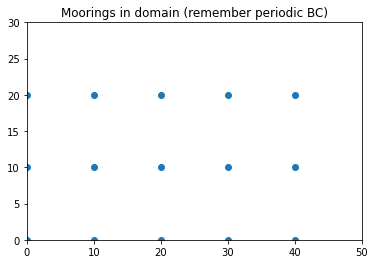

In [9]:
observation.plot_positions()

In [10]:
TruthGenerator.to_file(timestamp, simulator, prior_args, observation)

## Prior generation!


In [11]:
import Sampler 

sampler = Sampler.Sampler(grid, prior_args)
state = sampler.sample()

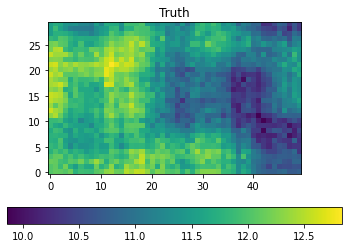

In [12]:
TruthGenerator.plot_truth(state, grid)

In [ ]:
crash

### Temporal evolution of model and observation

In [13]:
for t in range(10):
    print(t)
    state = simulator.propagate(state, steps=25)
    observation.observe(state)
    plot_truth(state)

0


NameError: name 'plot_truth' is not defined

### Store observations

In [ ]:
observation.to_file()